# COGS 108 - EDA Checkpoint

# Names

- Andrew Phan
- Aditya Kumar
- Dalila Solis
- Ricardo Aguilar
- Zach Yuen

<a id='research_question'></a>
# Research Question

Between poverty rates and access to mental health services, which factors correlate most significantly to gun violence in the United States?

# Setup

In [93]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Data Cleaning

Import data and remove unused columns

In [94]:
# Create Gun Violence Dataframe and remove unwanted columns
incidentsDF = pd.read_csv("Datasets/incident.csv")
incidentsDF = incidentsDF.drop(columns=['City_Or_County', 'Address', 'Killed', 'Injured', 'Incident_ID'])
incidentsDF = incidentsDF.sort_values(by='State_Code').reset_index(drop=True)

# Create Mental Health Dataframe
healthDF = pd.read_csv("Datasets/MentalHealth.csv")

# Create Poverty Dataframe
povertyDF = pd.read_csv("Datasets/Poverty.csv")
povertyDF = povertyDF.dropna()
povertyDF = povertyDF.rename(columns={'Table with row headers in column A and column headers in rows 5, 58, 111, 164, 217, 270, 323, 376, 429, 482, 535, 588, 641, 694, 747, 800, 853, 906, 959, 1012, 1065, 1118, 1171, 1224, 1277, 1330, 1383, 1436, 1489, 1542, 1595, 1648, 1701, 1754, 1807, 1860, 1913, 1966, 2019, 2072, 2125, 2178, 2231, and 2284': 'State', 'Unnamed: 1': 'Total population', 'Unnamed: 2': 'Number in poverty', 'Unnamed: 4': 'Percent in poverty'})
povertyDF = povertyDF.drop(index=3, columns={'Unnamed: 3', 'Unnamed: 5'})
povertyDF = povertyDF[povertyDF['State'] != 'State']
povertyDF = povertyDF.reset_index(drop=True)

Renaming State column in incidentsDF from state codes to full state names

In [95]:
incidentsDF = incidentsDF.rename(columns={'State_Code': 'State'})

# Rename from state codes to full state name
incidentsDF['State'] = incidentsDF['State'].replace('AK', 'Alaska')
incidentsDF['State'] = incidentsDF['State'].replace('AL', 'Alabama')
incidentsDF['State'] = incidentsDF['State'].replace('AZ', 'Arizona')
incidentsDF['State'] = incidentsDF['State'].replace('AR', 'Arkansas')
incidentsDF['State'] = incidentsDF['State'].replace('CA', 'California')
incidentsDF['State'] = incidentsDF['State'].replace('CO', 'Colorado')
incidentsDF['State'] = incidentsDF['State'].replace('CT', 'Connecticut')
incidentsDF['State'] = incidentsDF['State'].replace('DE', 'Delaware')
incidentsDF['State'] = incidentsDF['State'].replace('DC', 'District of Columbia')
incidentsDF['State'] = incidentsDF['State'].replace('FL', 'Florida')
incidentsDF['State'] = incidentsDF['State'].replace('GA', 'Georgia')
incidentsDF['State'] = incidentsDF['State'].replace('HI', 'Hawaii')
incidentsDF['State'] = incidentsDF['State'].replace('ID', 'Idaho')
incidentsDF['State'] = incidentsDF['State'].replace('IL', 'Illinois')
incidentsDF['State'] = incidentsDF['State'].replace('IA', 'Iowa')
incidentsDF['State'] = incidentsDF['State'].replace('IN', 'Indiana')
incidentsDF['State'] = incidentsDF['State'].replace('KS', 'Kansas')
incidentsDF['State'] = incidentsDF['State'].replace('KY', 'Kentucky')
incidentsDF['State'] = incidentsDF['State'].replace('LA', 'Louisiana')
incidentsDF['State'] = incidentsDF['State'].replace('ME', 'Maine')
incidentsDF['State'] = incidentsDF['State'].replace('MD', 'Maryland')
incidentsDF['State'] = incidentsDF['State'].replace('MA', 'Massachusetts')
incidentsDF['State'] = incidentsDF['State'].replace('MI', 'Michigan')
incidentsDF['State'] = incidentsDF['State'].replace('MN', 'Minnesota')
incidentsDF['State'] = incidentsDF['State'].replace('MS', 'Mississippi')
incidentsDF['State'] = incidentsDF['State'].replace('MO', 'Missouri')
incidentsDF['State'] = incidentsDF['State'].replace('MT', 'Montana')
incidentsDF['State'] = incidentsDF['State'].replace('NE', 'Nebraska')
incidentsDF['State'] = incidentsDF['State'].replace('NV', 'Nevada')
incidentsDF['State'] = incidentsDF['State'].replace('NH', 'New Hampshire')
incidentsDF['State'] = incidentsDF['State'].replace('NJ', 'New Jersey')
incidentsDF['State'] = incidentsDF['State'].replace('NM', 'New Mexico')
incidentsDF['State'] = incidentsDF['State'].replace('NY', 'New York')
incidentsDF['State'] = incidentsDF['State'].replace('NC', 'North Carolina')
incidentsDF['State'] = incidentsDF['State'].replace('ND', 'North Dakota')
incidentsDF['State'] = incidentsDF['State'].replace('OH', 'Ohio')
incidentsDF['State'] = incidentsDF['State'].replace('OK', 'Oklahoma')
incidentsDF['State'] = incidentsDF['State'].replace('OR', 'Oregon')
incidentsDF['State'] = incidentsDF['State'].replace('PA', 'Pennsylvania')
incidentsDF['State'] = incidentsDF['State'].replace('RI', 'Rhode Island')
incidentsDF['State'] = incidentsDF['State'].replace('SC', 'South Carolina')
incidentsDF['State'] = incidentsDF['State'].replace('SD', 'South Dakota')
incidentsDF['State'] = incidentsDF['State'].replace('TN', 'Tennessee')
incidentsDF['State'] = incidentsDF['State'].replace('TX', 'Texas')
incidentsDF['State'] = incidentsDF['State'].replace('UT', 'Utah')
incidentsDF['State'] = incidentsDF['State'].replace('VT', 'Vermont')
incidentsDF['State'] = incidentsDF['State'].replace('VA', 'Virginia')
incidentsDF['State'] = incidentsDF['State'].replace('WA', 'Washington')
incidentsDF['State'] = incidentsDF['State'].replace('WV', 'West Virginia')
incidentsDF['State'] = incidentsDF['State'].replace('WI', 'Wisconsin')
incidentsDF['State'] = incidentsDF['State'].replace('WY', 'Wyoming')

Removing duplicate years from the poverty dataset

In [96]:
povertyDF = povertyDF.drop(index=range(255,306))
povertyDF = povertyDF.reset_index(drop=True)
povertyDF = povertyDF.drop(index=range(255,306))
povertyDF = povertyDF.reset_index(drop=True)

Adding the "Year" column to povertyDF

In [97]:
year = 2021
for i in range(len(povertyDF)):
    if povertyDF.at[i, 'State'] == "Alabama" and i != 0:
        year -= 1
    povertyDF.at[i, 'Year'] = year
povertyDF = povertyDF.astype({'Year': int})
povertyDF = povertyDF.dropna()
povertyDF = povertyDF.reset_index(drop=True)
povertyDF['Percent in poverty'] = pd.to_numeric(povertyDF['Percent in poverty'])
povertyDF['Total population'] = povertyDF['Total population'].str.replace(',', '').astype(int) * 1000

# Data Analysis & Results (EDA)

In this section, we will anaylze the time related trends related to gun violence incidents in the United States. Below we will plot the number of gun violence incidents specifically by years.

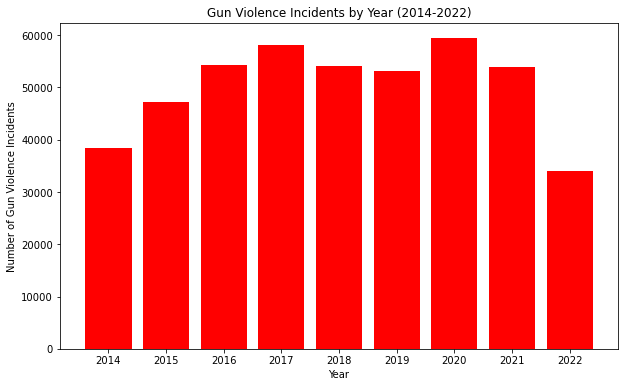

In [98]:
# Filter data for the years (2014-2022)
start_year = '2014'
end_year = '2022'
incidents_by_year = incidentsDF[(incidentsDF['Incident_Date'].str[:4] >= start_year) & (incidentsDF['Incident_Date'].str[:4] <= end_year)]

# Extract the year from the incident dates
incidents_by_year['Year'] = incidents_by_year['Incident_Date'].str[:4]

# Count the number of incidents for each year
incident_counts = incidents_by_year['Year'].value_counts().sort_index()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(incident_counts.index, incident_counts.values, color='red')
plt.xlabel('Year')
plt.ylabel('Number of Gun Violence Incidents')
plt.title('Gun Violence Incidents by Year (2014-2022)')
plt.show()

From the histogram above, we can clearly see the distribution of gun violence incidents across the years 2014 to 2022 which are steadily increasing every year. It is evident that the year 2022 has as a significant drop in the number of gun violence incidents.

In this next section, we will anaylze the correlation between each state's mental health rank (a higher ranking, closer to 1, indicates lower prevalence of mental illness and higher rates of access to care) and the number of gun violence incidents it encountered. We will do so by plotting a state's rank compared to its number of incidents for years 2015-2022.

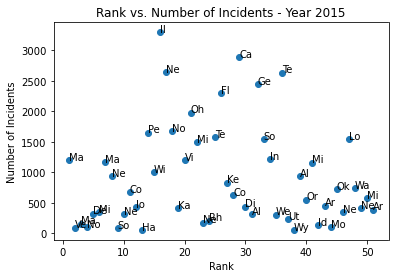

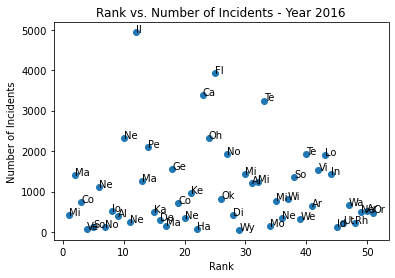

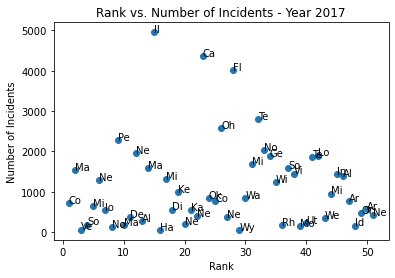

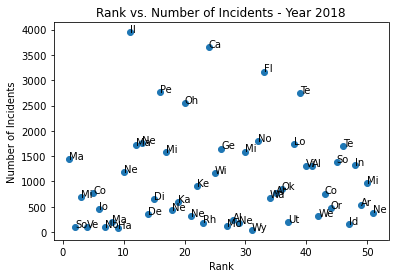

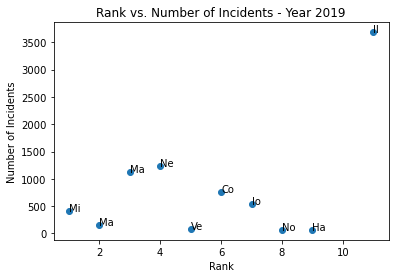

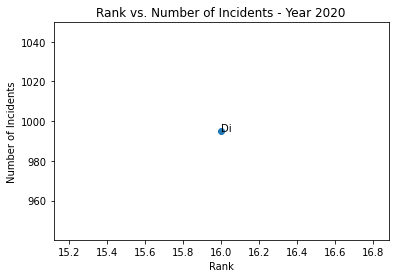

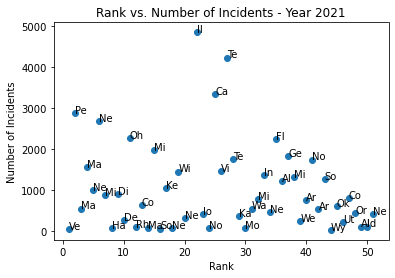

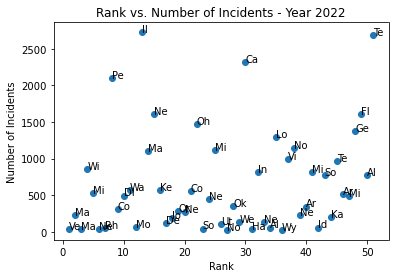

In [99]:
# Create Mental Helath Dataframe
mentalDF = pd.read_csv("Datasets/MentalHealth.csv")

# Converting Incident_Date column to datetime type and extracting the year
incidentsDF['Incident_Date'] = pd.to_datetime(incidentsDF['Incident_Date'])
incidentsDF['Year'] = incidentsDF['Incident_Date'].dt.year

# Grouping incidentsDF by Year and State and counting the occurrences
totalIncidentsDF = incidentsDF.groupby(['Year', 'State']).size().reset_index(name='Total_Incidents')

# Removing rows with the year 2014 since there's no mental health data from that year
totalIncidentsDF = totalIncidentsDF[totalIncidentsDF['Year'] != 2014]

# Plotting scatterplots
years = totalIncidentsDF['Year'].unique()
for year in years:
    data_year = totalIncidentsDF[totalIncidentsDF['Year'] == year]
    merged_df = pd.merge(data_year, mentalDF, on=['Year', 'State'])
    # print(merged_df)
    plt.scatter(merged_df['Rank'], merged_df['Total_Incidents'])
    plt.title(f'Rank vs. Number of Incidents - Year {year}')
    plt.xlabel('Rank')
    plt.ylabel('Number of Incidents')
    
    # Labeling the dots with state abbreviations
    for i in range(len(merged_df)):
        state_abbr = merged_df['State'].iloc[i][:2]  # Extract first two characters as abbreviation
        plt.text(merged_df['Rank'].iloc[i], merged_df['Total_Incidents'].iloc[i], state_abbr)
    
    plt.show()

In the next section, we will analyze the correlation between the poverty rate in each state and the number of gun violence indcidents per 100,000 people. We will do so by plotting a state's poverty rate against the number of incidents per 100,000 people for years 2015-2021

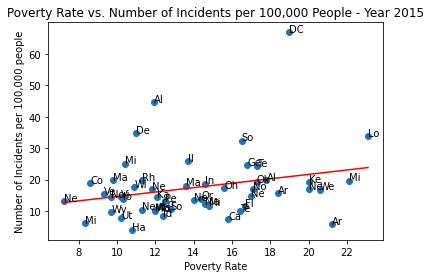

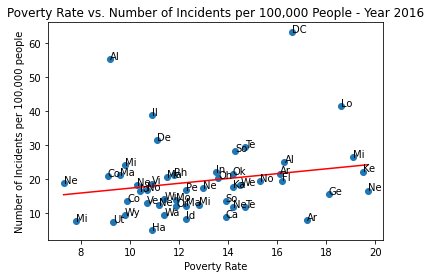

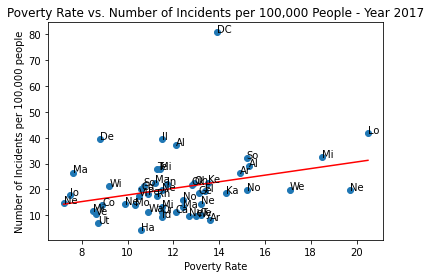

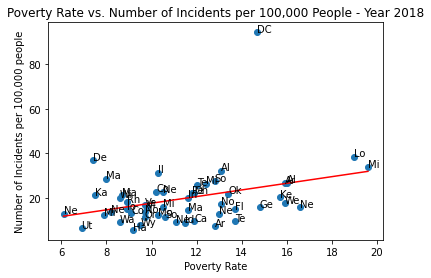

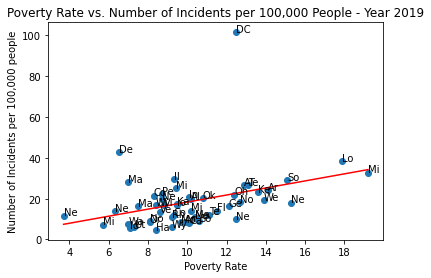

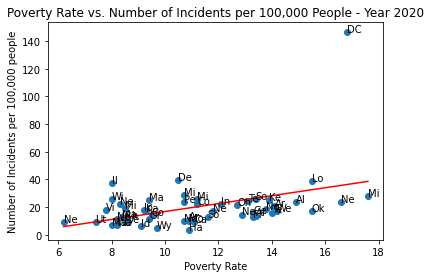

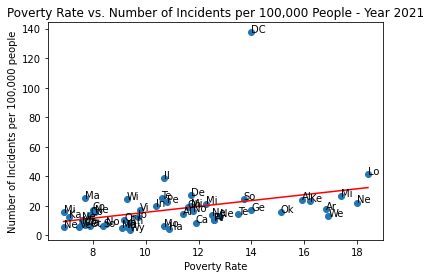

In [117]:
mask = povertyDF['Year'] >= 2015
povertyDF = povertyDF[mask]

mask = totalIncidentsDF['Year'] <= 2021
totalIncidentsDF = totalIncidentsDF[mask]

for year in totalIncidentsDF['Year'].unique():
    data_year = totalIncidentsDF[totalIncidentsDF['Year'] == year]
    merged_df = pd.merge(data_year, povertyDF, on=['Year', 'State'])
    merged_df = merged_df.sort_values('Percent in poverty').reset_index(drop=True)
    merged_df['Total Incidents per 100,000 people'] = (merged_df['Total_Incidents'] / (merged_df['Total population'])) * 100000
#     print(merged_df)
    plt.scatter(merged_df['Percent in poverty'], merged_df['Total Incidents per 100,000 people'])
    plt.title(f'Poverty Rate vs. Number of Incidents per 100,000 People - Year {year}')
    plt.xlabel('Poverty Rate')
    plt.ylabel('Number of Incidents per 100,000 people')

    # Labeling the dots with state abbreviations
    for i in range(len(merged_df)):
        state_abbr = merged_df['State'].iloc[i][:2]  # Extract first two characters as abbreviation
        if state_abbr == 'Di':
            state_abbr = 'DC'
        plt.text(merged_df['Percent in poverty'].iloc[i], merged_df['Total Incidents per 100,000 people'].iloc[i], state_abbr)
    
    slope, intercept = np.polyfit(merged_df['Percent in poverty'], merged_df['Total Incidents per 100,000 people'], 1)
    trendline = slope * merged_df['Percent in poverty'] + intercept
    plt.plot(merged_df['Percent in poverty'], trendline, color='red')
    plt.show()


From the trendlines on each of the scatterplots, we can see that there is a slightly positive correlation between the poverty rate of a state and the number of incidents per 100,000 people in that state. We also see that Washington DC is an extreme with a much higher number of incidents per 100,000 people for the poverty rate. 